In [5]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
data = pd.read_csv('datasets/football-events/events.csv', index_col=['id_event'])

In [8]:
data.shape

(941009, 21)

In [9]:
data.columns

Index(['id_odsp', 'sort_order', 'time', 'text', 'event_type', 'event_type2',
       'side', 'event_team', 'opponent', 'player', 'player2', 'player_in',
       'player_out', 'shot_place', 'shot_outcome', 'is_goal', 'location',
       'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

In [10]:
!head 'datasets/football-events/dictionary.txt'

In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.__dict__

{'_data': BlockManager
 Items: Index(['id_odsp', 'sort_order', 'time', 'text', 'event_type', 'event_type2',
        'side', 'event_team', 'opponent', 'player', 'player2', 'player_in',
        'player_out', 'shot_place', 'shot_outcome', 'is_goal', 'location',
        'bodypart', 'assist_method', 'situation', 'fast_break'],
       dtype='object')
 Axis 1: Index(['UFot0hit1', 'UFot0hit2', 'UFot0hit3', 'UFot0hit4', 'UFot0hit5',
        'UFot0hit6', 'UFot0hit7', 'UFot0hit8', 'UFot0hit9', 'UFot0hit10',
        ...
        'z5L2OT5E118', 'z5L2OT5E119', 'z5L2OT5E120', 'z5L2OT5E121',
        'z5L2OT5E122', 'z5L2OT5E123', 'z5L2OT5E124', 'z5L2OT5E125',
        'z5L2OT5E126', 'z5L2OT5E127'],
       dtype='object', name='id_event', length=941009)
 FloatBlock: [5, 13, 14, 16, 17, 19], 6 x 941009, dtype: float64
 IntBlock: [1, 2, 4, 6, 15, 18, 20], 7 x 941009, dtype: int64
 ObjectBlock: [0, 3, 7, 8, 9, 10, 11, 12], 8 x 941009, dtype: object,
 '_item_cache': {},
 'is_copy': None}

In [16]:
data.event_team.value_counts()

Juventus                      12054
Fiorentina                    11802
Real Madrid                   11644
AC Milan                      11633
AS Roma                       11482
Genoa                         11474
Lazio                         11362
Lille                         11347
Atalanta                      11288
Napoli                        11272
Sevilla                       11197
Atletico Madrid               11192
Marseille                     11166
Chievo Verona                 11164
Valencia                      11123
Internazionale                11112
Lyon                          11106
Barcelona                     10946
Montpellier                   10915
Toulouse                      10912
Udinese                       10787
Malaga                        10705
Athletic Bilbao               10703
Espanyol                      10662
Paris Saint-Germain           10626
Bordeaux                      10543
Real Sociedad                 10473
St Etienne                  

In [32]:
data.situation.value_counts()

1.0    193747
3.0     18226
2.0     11742
4.0      5422
Name: situation, dtype: int64

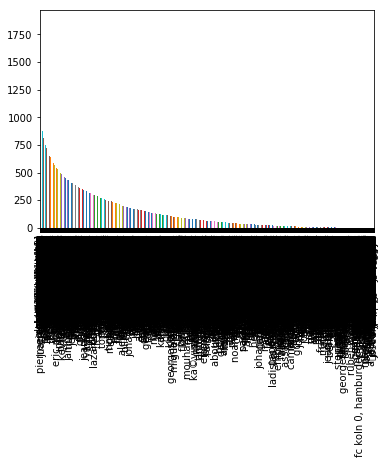

In [33]:
data.player.value_counts().plot(kind='bar')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 941009 entries, UFot0hit1 to z5L2OT5E127
Data columns (total 21 columns):
id_odsp          941009 non-null object
sort_order       941009 non-null int64
time             941009 non-null int64
text             941009 non-null object
event_type       941009 non-null int64
event_type2      214293 non-null float64
side             941009 non-null int64
event_team       941009 non-null object
opponent         941009 non-null object
player           880009 non-null object
player2          291310 non-null object
player_in        51715 non-null object
player_out       51738 non-null object
shot_place       227459 non-null float64
shot_outcome     228498 non-null float64
is_goal          941009 non-null int64
location         467067 non-null float64
bodypart         229185 non-null float64
assist_method    941009 non-null int64
situation        229137 non-null float64
fast_break       941009 non-null int64
dtypes: float64(6), int64(7), object(8)
memo

In [36]:
data.describe()

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
count,941009.000000,941009.000000,941009.000000,214293.000000,941009.000000,227459.000000,228498.000000,941009.000000,467067.000000,229185.000000,941009.000000,229137.000000,941009.000000
mean,53.858826,49.663663,4.326575,12.233764,1.481170,5.733693,1.926555,0.025978,6.209073,1.624831,0.264332,1.281316,0.004876
std,32.014268,26.488977,2.995313,0.468850,0.499646,3.326100,0.797055,0.159071,5.421736,0.740400,0.655501,0.709394,0.069655
min,1.000000,0.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,27.000000,2.000000,12.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,53.000000,51.000000,3.000000,12.000000,1.000000,5.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,79.000000,73.000000,8.000000,12.000000,2.000000,9.000000,3.000000,0.000000,11.000000,2.000000,0.000000,1.000000,0.000000
max,180.000000,100.000000,11.000000,15.000000,2.000000,13.000000,4.000000,1.000000,19.000000,3.000000,4.000000,4.000000,1.000000


In [37]:
data.isnull().sum().sort_values()

id_odsp               0
assist_method         0
is_goal               0
opponent              0
event_team            0
side                  0
fast_break            0
event_type            0
text                  0
time                  0
sort_order            0
player            61000
location         473942
player2          649699
bodypart         711824
situation        711872
shot_outcome     712511
shot_place       713550
event_type2      726716
player_out       889271
player_in        889294
dtype: int64

In [38]:
data[data.situation.isnull()]

,id_odsp,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
id_event,,,,,,,,,,,,,,,,,,,,,
UFot0hit2,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
UFot0hit3,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
UFot0hit4,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
UFot0hit5,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
UFot0hit6,UFot0hit/,6,9,Hand ball by Jose Paolo Guerrero (Hamburg).,10,NaN,2,Hamburg SV,Borussia Dortmund,jose paolo guerrero,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
UFot0hit7,UFot0hit/,7,10,"Corner, Hamburg. Conceded by Lukasz Piszczek.",2,NaN,2,Hamburg SV,Borussia Dortmund,lukasz piszczek,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
UFot0hit8,UFot0hit/,8,11,Chris Lowe (Borussia Dortmund) wins a free kic...,8,NaN,1,Borussia Dortmund,Hamburg SV,chris lowe,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
UFot0hit9,UFot0hit/,9,11,Foul by Gojko Kacar (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,gojko kacar,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
UFot0hit10,UFot0hit/,10,13,Foul by Gokhan Tore (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
